<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_5/xai_with_cam_and_occlusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install tf-explain
%pip install opencv
%pip install matplotlib
%pip install glob

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [15]:
# import
import pandas as pd
import numpy as np

from google.colab import drive

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LeakyReLU, BatchNormalization, Reshape, Activation, UpSampling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16


from sklearn.model_selection import train_test_split
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


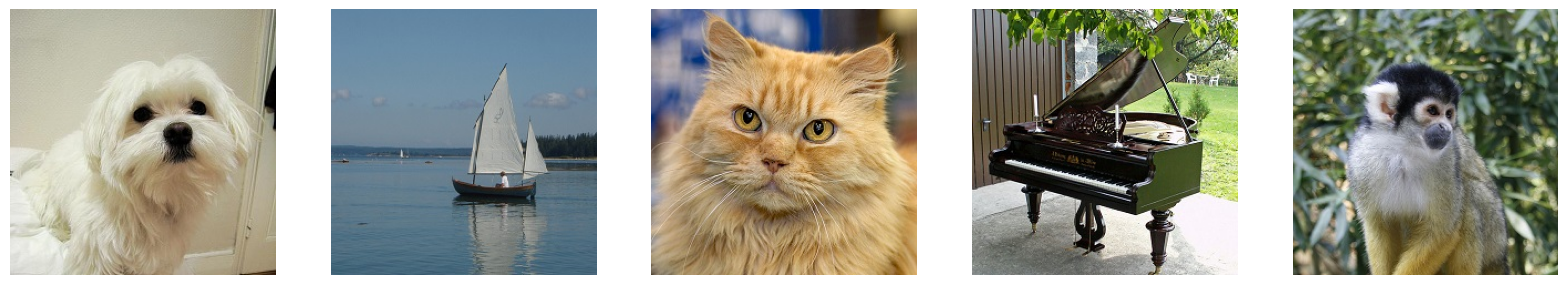

In [11]:
# use Google drive
drive.mount('/d')
data_path = '/d/My Drive/Colab Notebooks/DL-tutorial/data/img/*_0.jpg'

# load images from 'data_path'
imgs = []
for img_path in glob.glob(data_path):
  imgs.append(mpimg.imread(img_path))

img_names = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
img_index_imagenet = ["153", "283", "382", "579", "914"]

# show imgs
plt.figure(figsize=(20,20))
for i, img in enumerate(imgs):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(img)

In [16]:
"""
load model VGG16
"""
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 4s 0us/step


#Class Activation Map(CAM)
https://wikidocs.net/135874

https://www.pinecone.io/learn/class-activation-maps/


In [21]:
"""
modeling with CAM
"""
imgs_cam = [] # images with CAM applied

explainer = GradCAM()

for (name, index) in zip(img_names, img_index_imagenet):
  img = load_img('/d/My Drive/Colab Notebooks/DL-tutorial/data/img/{}_0.jpg'.format(name), target_size=(224, 224))
  img = img_to_array(img) # image -> np.array
  print(img.shape) # (224, 224, 3)
  data = ([img], None)
  # CAM applied to VGG16 model
  grid = explainer.explain(data, model, int(index)) # data, model, class_idx
  explainer.save(grid, '/d/My Drive/Colab Notebooks/DL-tutorial/models/cam/', '{}_cam.jpg'.format(name))


for img_path in glob.glob('/d/My Drive/Colab Notebooks/DL-tutorial/models/cam/*_cam.jpg'):
  imgs_cam.append(mpimg.imread(img_path))

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


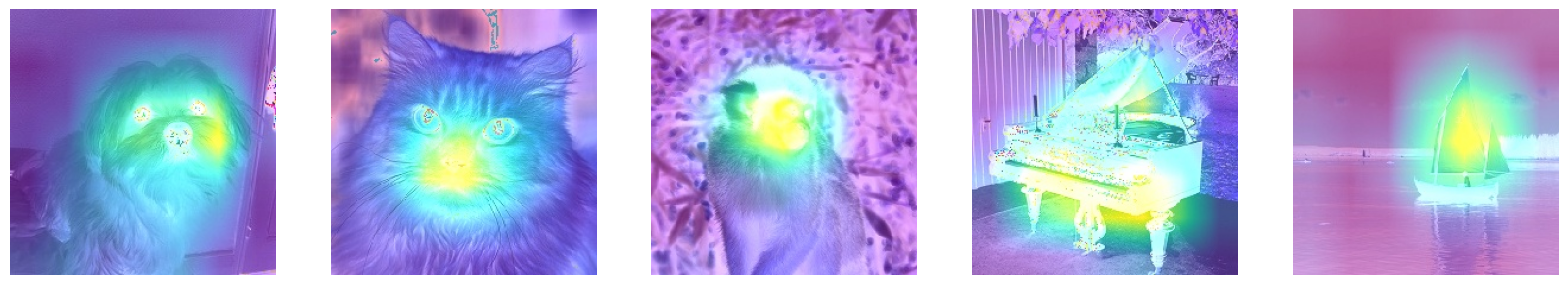

In [23]:
# show cam imgs
plt.figure(figsize=(20,20))
for i, img_cam in enumerate(imgs_cam):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(img_cam)

#Occlusion
https://blog.roboflow.com/occlusion-computer-vision/

In [25]:
"""
modeling with Occlusion
"""
imgs_occ = [] # images with Occlusion applied

explainer = OcclusionSensitivity()
patch_size = 40 # size of the erase of Occlusion

for (name, index) in zip(img_names, img_index_imagenet):
  img = load_img('/d/My Drive/Colab Notebooks/DL-tutorial/data/img/{}_0.jpg'.format(name), target_size=(224, 224))
  img = img_to_array(img) # image -> np.array
  data = ([img], None)
  # Occlusion applied to VGG16 model
  grid = explainer.explain(data, model, int(index), patch_size) # data, model, class_idx, patch_size
  explainer.save(grid, '/d/My Drive/Colab Notebooks/DL-tutorial/models/occ/', '{}_occ.jpg'.format(name))


for img_path in glob.glob('/d/My Drive/Colab Notebooks/DL-tutorial/models/occ/*_occ.jpg'):
  imgs_occ.append(mpimg.imread(img_path))

2/2 [==============================] - 0s 116ms/step


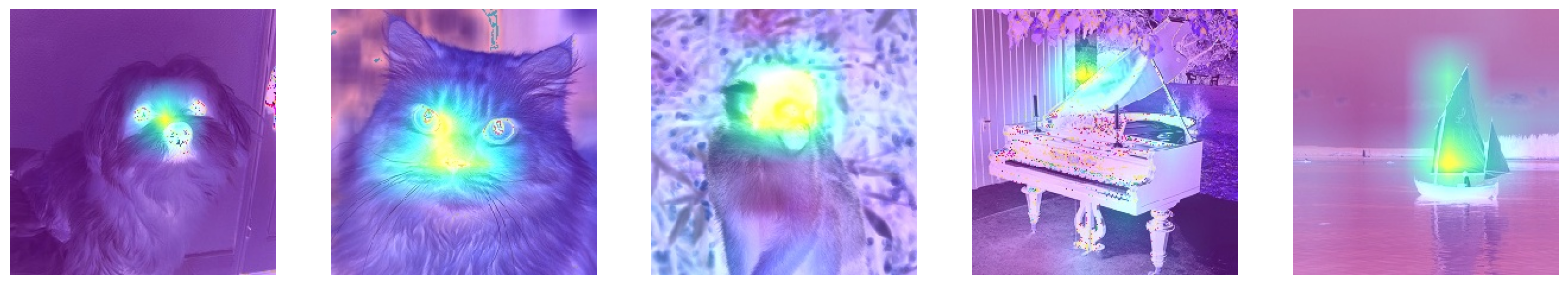

In [26]:
# show cam imgs
plt.figure(figsize=(20,20))
for i, img_occ in enumerate(imgs_occ):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(img_occ)